Note Description:

Create Sentinel-1 image time series with False color.

Convert distribution and remove outliers of values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
from tqdm.notebook import tqdm

import xarray as xr
import rioxarray as rxr

import xrspatial.multispectral as ms

share_folder = '/geoanalytics_user_shared_data/vtang/PEOPLE-ER_Vietnam/'

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-p19u1qqe because the default path (/home/users/vtang/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
def normalize(val, lower=.1, upper=99.9):
    vmin = np.nanpercentile(val, lower)
    vmax = np.nanpercentile(val, upper)
    val2 = val.copy()
    val2[val2 < vmin] = vmin
    val2[val2 > vmax] = vmax
    val2 = (val2 - vmin) / (vmax - vmin)
    return val2

In [3]:
target_year = 2021

fpath_list = glob.glob(
    share_folder + 'sentinel-1/{}/10d_composition/*.tif'.format(target_year))

  0%|          | 0/36 [00:00<?, ?it/s]

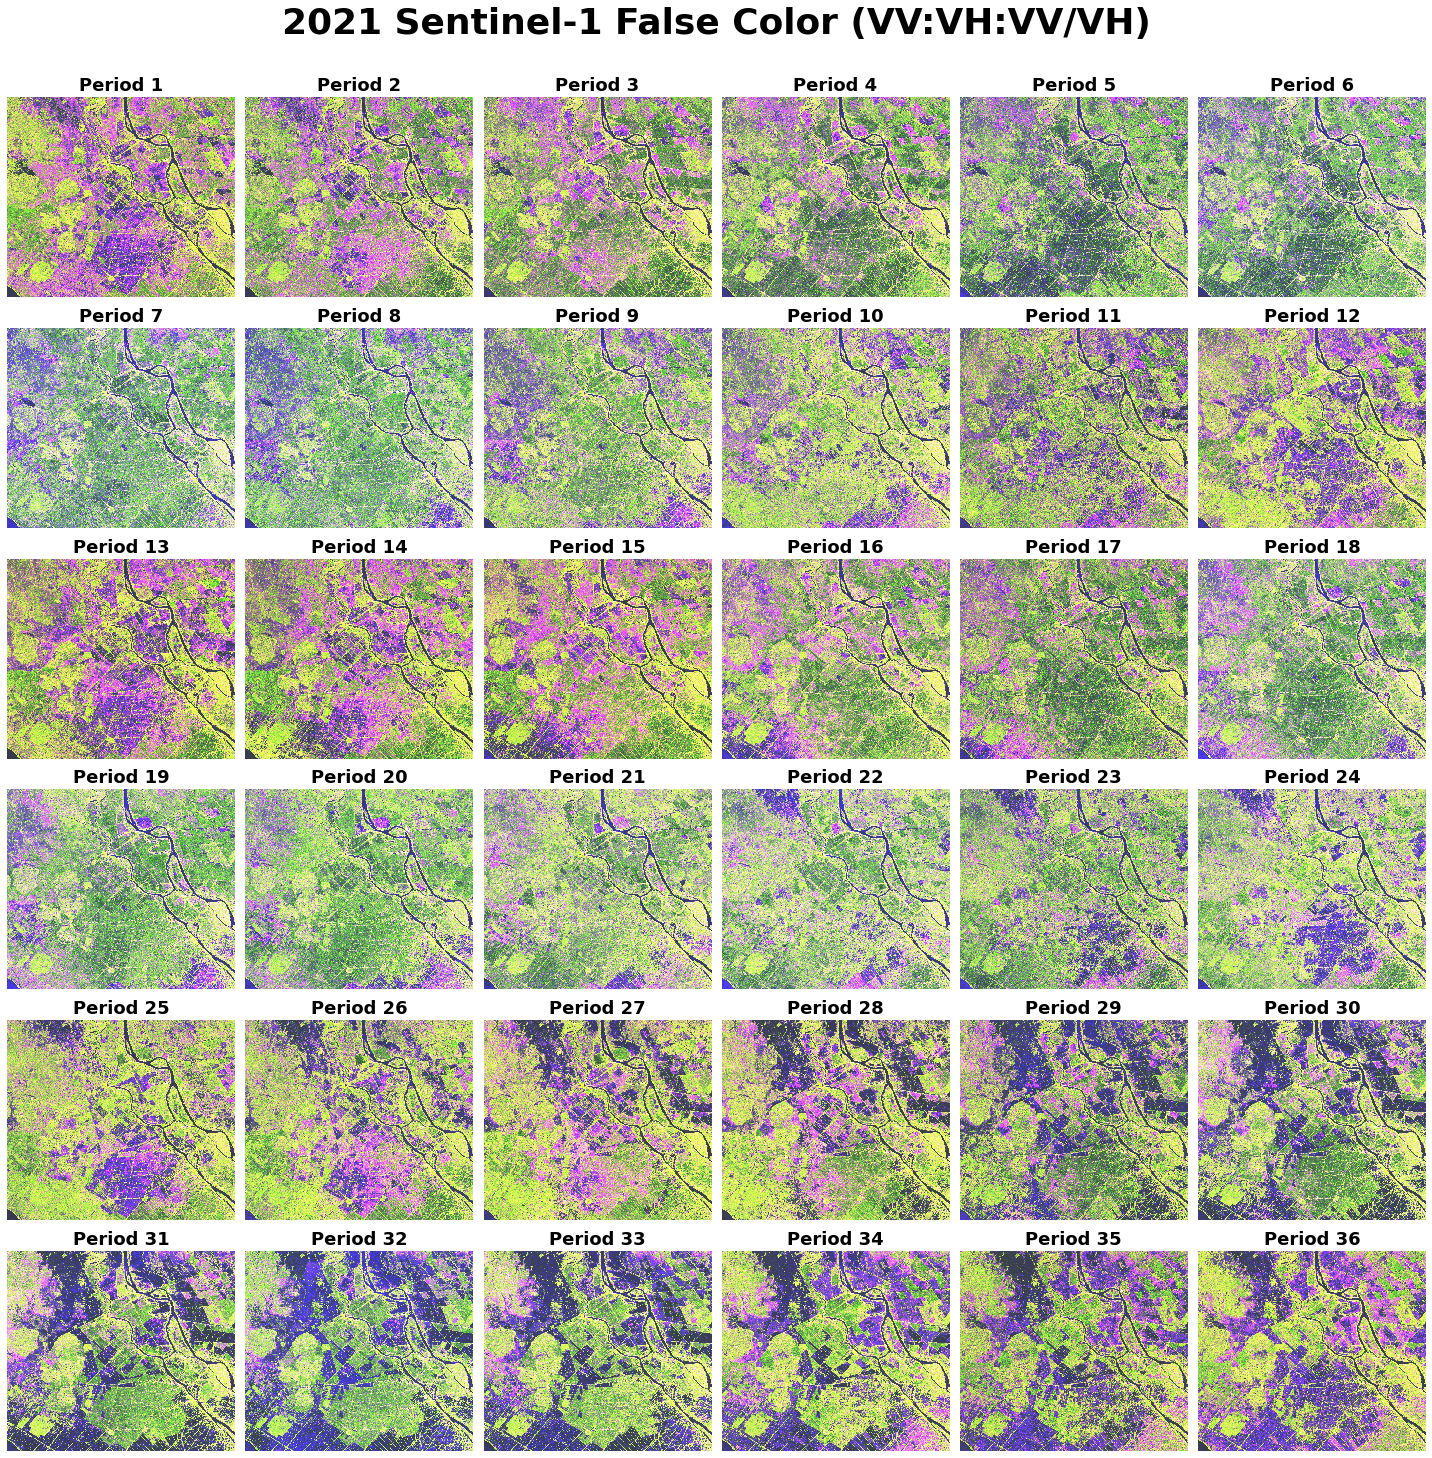

In [4]:
fpath_list = fpath_list[:36]

fig, axes = plt.subplots(6, 6, figsize=[20, 20], facecolor='white')
axes = axes.ravel()

for fpath in tqdm(fpath_list):

    i = int(fpath.split('_')[-1].split('.')[0])

    da = rxr.open_rasterio(fpath).assign_coords(band=['vh', 'vv'])

    vv = da.sel(band='vv')
    vh = da.sel(band='vh')
    rvh = vv / vh
    
    vv.values = normalize(vv.values, 1, 99)
    vh.values = normalize(vh.values, 1, 99)
    rvh.values = normalize(rvh.values, 1, 99)

    img = ms.true_color(r=vv, g=vh, b=rvh, nodata=np.nan,)

    ax = axes[i - 1]
    img.plot.imshow(ax=ax)
    ax.set_title('Period {}'.format(i), fontsize=18, fontweight='bold')
    ax.set_axis_off()

fig.suptitle(
    '{} Sentinel-1 False Color (VV:VH:VV/VH)'.format(target_year),
    fontsize=36, fontweight='bold', y=1.,
)
fig.tight_layout()